In [11]:
import numpy as np
from ifxAvian import Avian
from ifxAvian.RadarTypes import DeviceConfig
import time
import matplotlib.pyplot as plt
import cv2
# using for bgt60tr13c


In [12]:
print("Radar SDK Version: " + Avian.get_version())
Avian.__file__

fs = 400
frame_time = 1/fs
num_samples_per_chirp = 512

# device = Avian.Device()


Radar SDK Version: 3.3.1


In [13]:

# set device config
config = Avian.DeviceConfig(
    sample_rate_Hz=1_000_000,       # ADC sample rate of 1MHZ
    rx_mask=5,                      # activate RX1 and RX3
    tx_mask=1,                      # activate TX1
    if_gain_dB=33,                  # gain of 33dB
    tx_power_level=31,              # TX power level of 31
    start_frequency_Hz=58e9,        # start frequency of chirp: 58 Ghz
    end_frequency_Hz=63.5e9,        # end frequency of chirp: 63.5 GHz
    num_chirps_per_frame=1,         # 1 chirps per frame
    # 512 samples per chirp # higher number = higher range resolution
    num_samples_per_chirp=num_samples_per_chirp,
    chirp_repetition_time_s=0.001,  # 1ms, as long as higher than num_samples_per_chirp * 1 us
    frame_repetition_time_s=1/fs,   # 5ms, frame_Rate = 200Hz
    hp_cutoff_Hz=80_000,            # 80kHz cutoff frequency for high-pass filter
    aaf_cutoff_Hz=500_000,          # Anti-aliasinf cutoff frequency of 500kHz
    mimo_mode='off'                 # MIMO disabled
)
# config.frame_repetition_time_s = 10000000


"""
5.5ghz bandwidth
1 mhz adc sampling rate
512 samples per chirp
1 chirp per frame
400 frame per second

range resolution = c/2b = 0.027m = 2.7cm
max range = 2.7cm * 512 / 2 =  6.912 m

"""

'\n5.5ghz bandwidth\n1 mhz adc sampling rate\n512 samples per chirp\n1 chirp per frame\n400 frame per second\n\nrange resolution = c/2b = 0.027m = 2.7cm\nmax range = 2.7cm * 512 / 2 =  6.912 m\n\n'

In [22]:
def readFile(path,fn,fs):
    outfile = path+fn
    npzfile = np.load(outfile)
    frameData = npzfile['frameData']
    timestamps = npzfile['timestamps']
    print(np.shape(frameData))
    print(np.shape(timestamps))
    print(np.shape(fs))
    frameData = np.squeeze(frameData)
    frameData = frameData - np.mean(frameData, axis=0, keepdims=True)
    print(np.shape(frameData))
    
    data = np.fft.fft(frameData, axis=1)
    data = data[:,:int(data.shape[1]/2)]
    print(np.shape(data))

    # amp = np.abs(data[:,0:30]).T
    # phase = np.angle(data[:,0:30]).T
    amp = np.abs(data).T
    phase = np.angle(data).T
    print(np.shape(amp))
    print(np.shape(phase))
    amp_db = 20 * np.log10(amp)
    return amp_db,phase
#path = "F:\\UCSD\\Winter2023\\CSE237A\\FinalProj\\Github\\WaterSurfaceLevelSensing\\sampleData\\"
# path = "D:\\UCSD\\Winter2023\\CSE237A\\WaterSurfaceLevelSensing\\sampleData\\"

path = "D:\\UCSD\\Winter2023\\MetaWaveData\\MetaWave_Artifact\\SampleResults\\02282023_mmwaveData\\"
fs=400
amp_normal,phase_normal = readFile(path,'data_10.npz',fs)
amp_attack,phase_attack = readFile(path,'data_13.npz',fs)
# fs = npzfile['fs']
# fs = 400
# (100, 128, 64) 
# 100 frames, 128 chirps per frame, 64 adc samples per chirp

(12000, 1, 512)
(12000,)
()
(12000, 512)
(12000, 256)
(256, 12000)
(256, 12000)
(12000, 1, 512)
(12000,)
()
(12000, 512)
(12000, 256)
(256, 12000)
(256, 12000)


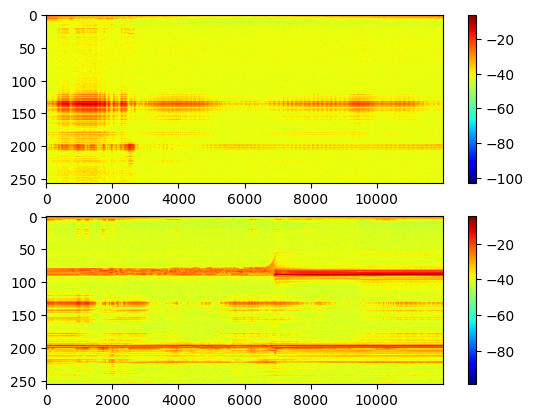

In [23]:
plt.figure();
plt.subplot(2,1,1)
plt.imshow(amp_normal, cmap=plt.cm.jet, aspect="auto")
plt.colorbar()

plt.subplot(2,1,2)
plt.imshow(amp_attack, cmap=plt.cm.jet, aspect="auto")
plt.colorbar()
